In [7]:
import matplotlib.pyplot as plt
import matplotlib
import scipy
import numpy as np

In [66]:
matplotlib.rcParams.update({'font.size': 22})

In [67]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
def read(spe_filename):
    """given a .Spe file, return the data as a numpy array"""
    N_CHANNELS = 8191
    START_LINE = 13
    
    with open(spe_filename, "r", encoding="utf-8") as spe_file:
        spe_lines = spe_file.readlines()
    data_lines = spe_lines[START_LINE:START_LINE+N_CHANNELS]
    data_nums = [int(d.strip().replace("\n", "")) for d in data_lines]
    return np.array(data_nums)

In [15]:
spectrum_co60 = read('run2_co60.Spe')
spectrum_ba133 = read('run4_ba133.Spe')
spectrum_na22 = read('run5_na22.Spe')
spectrum_x = read('run6_mistery_source.Spe')
spectrum_bkg = read('run3_background.Spe')

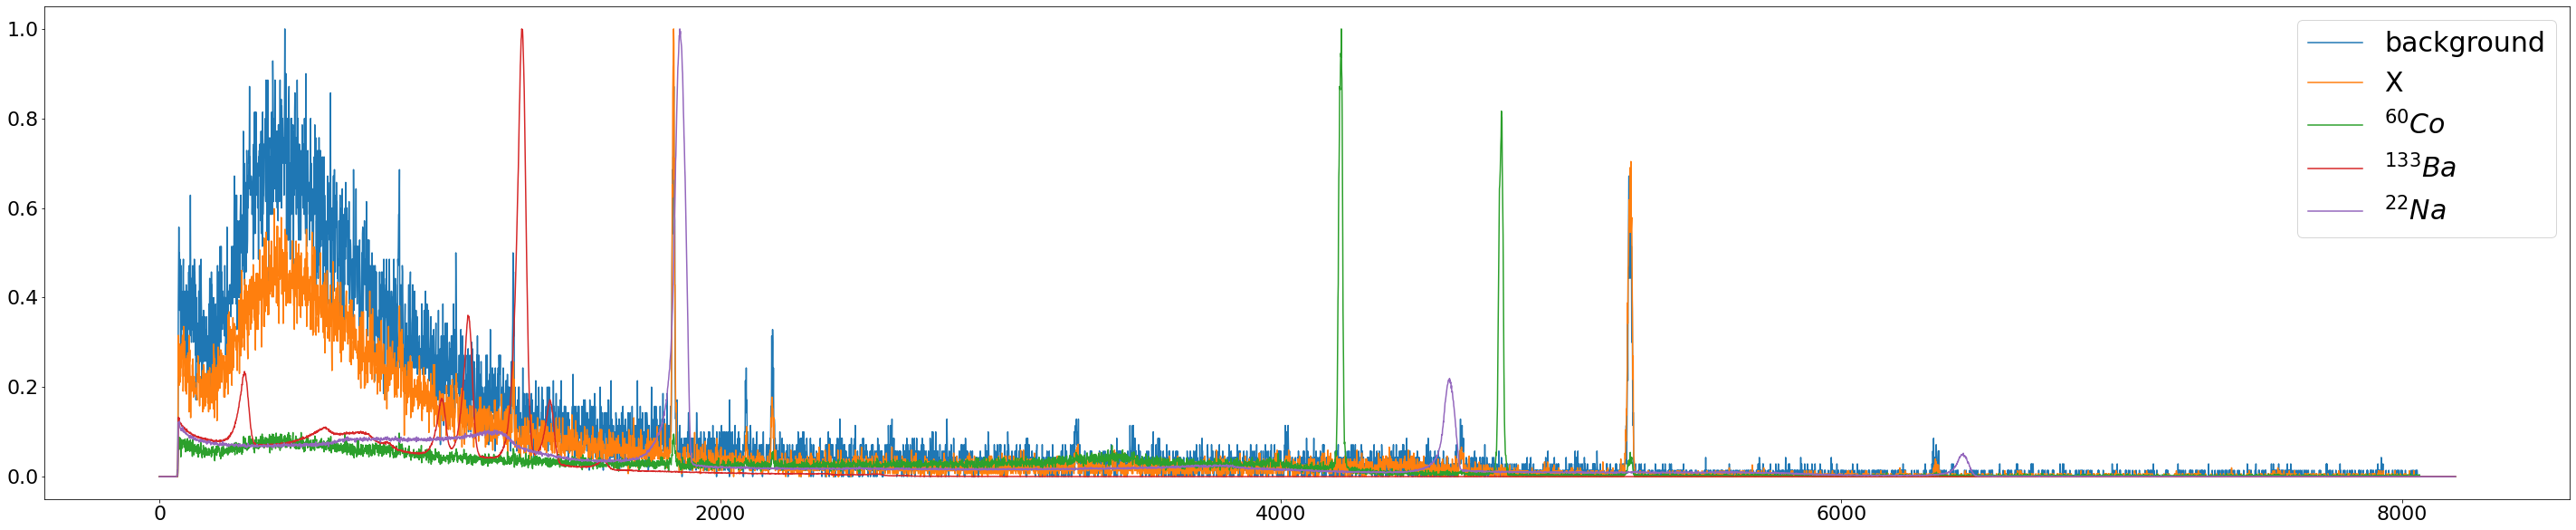

In [68]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
plt.plot(spectrum_x/max(spectrum_x), label=r'X')
plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

(0.0, 1000.0)

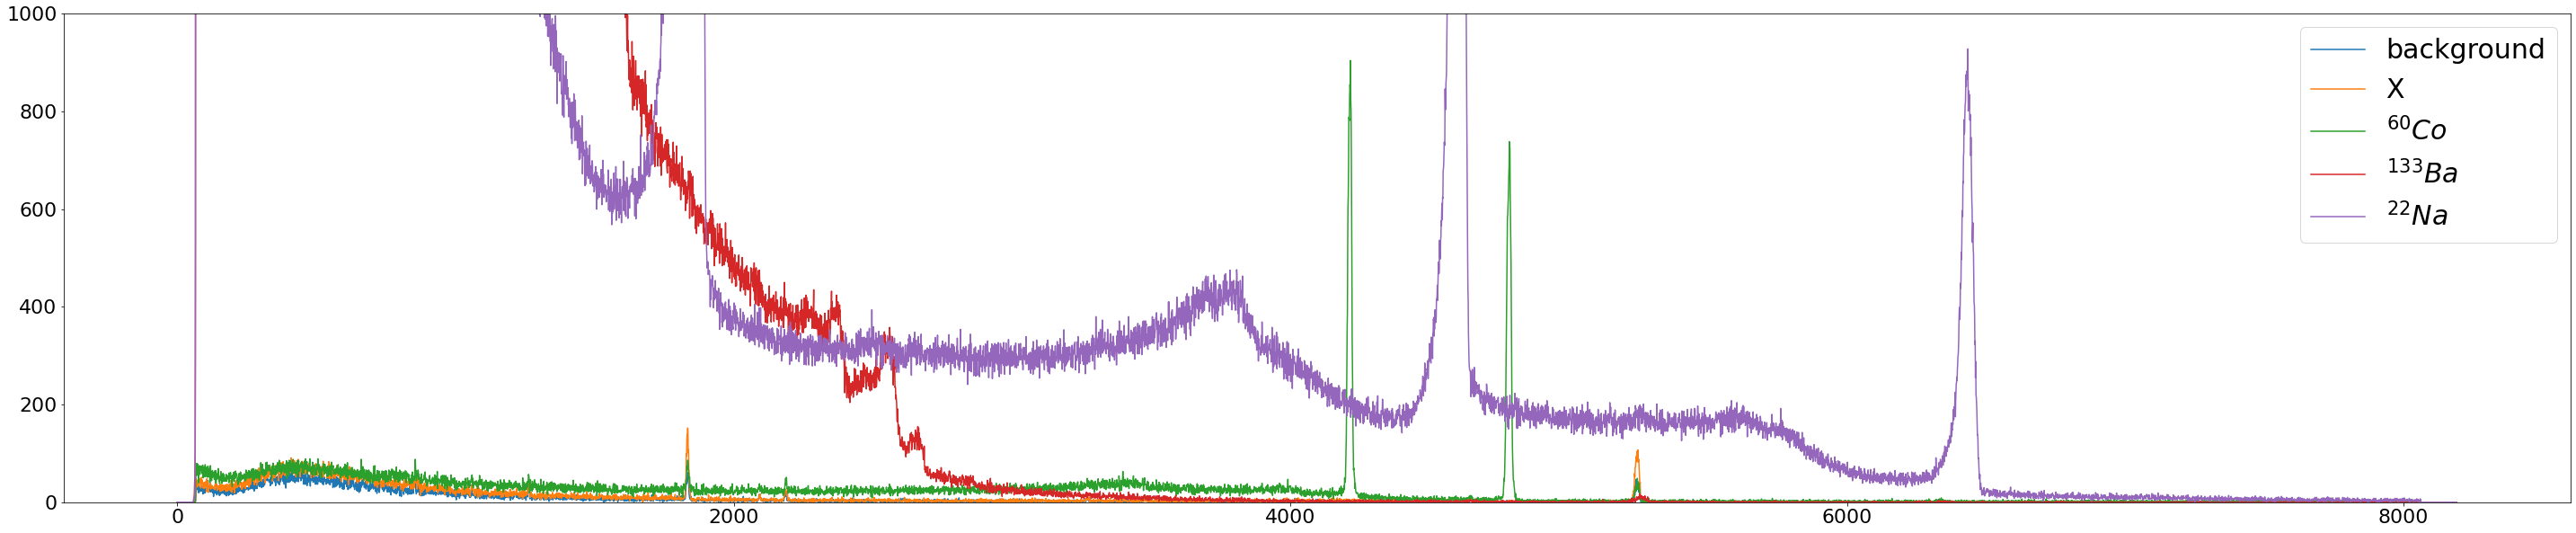

In [69]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
plt.ylim(0, 1000)

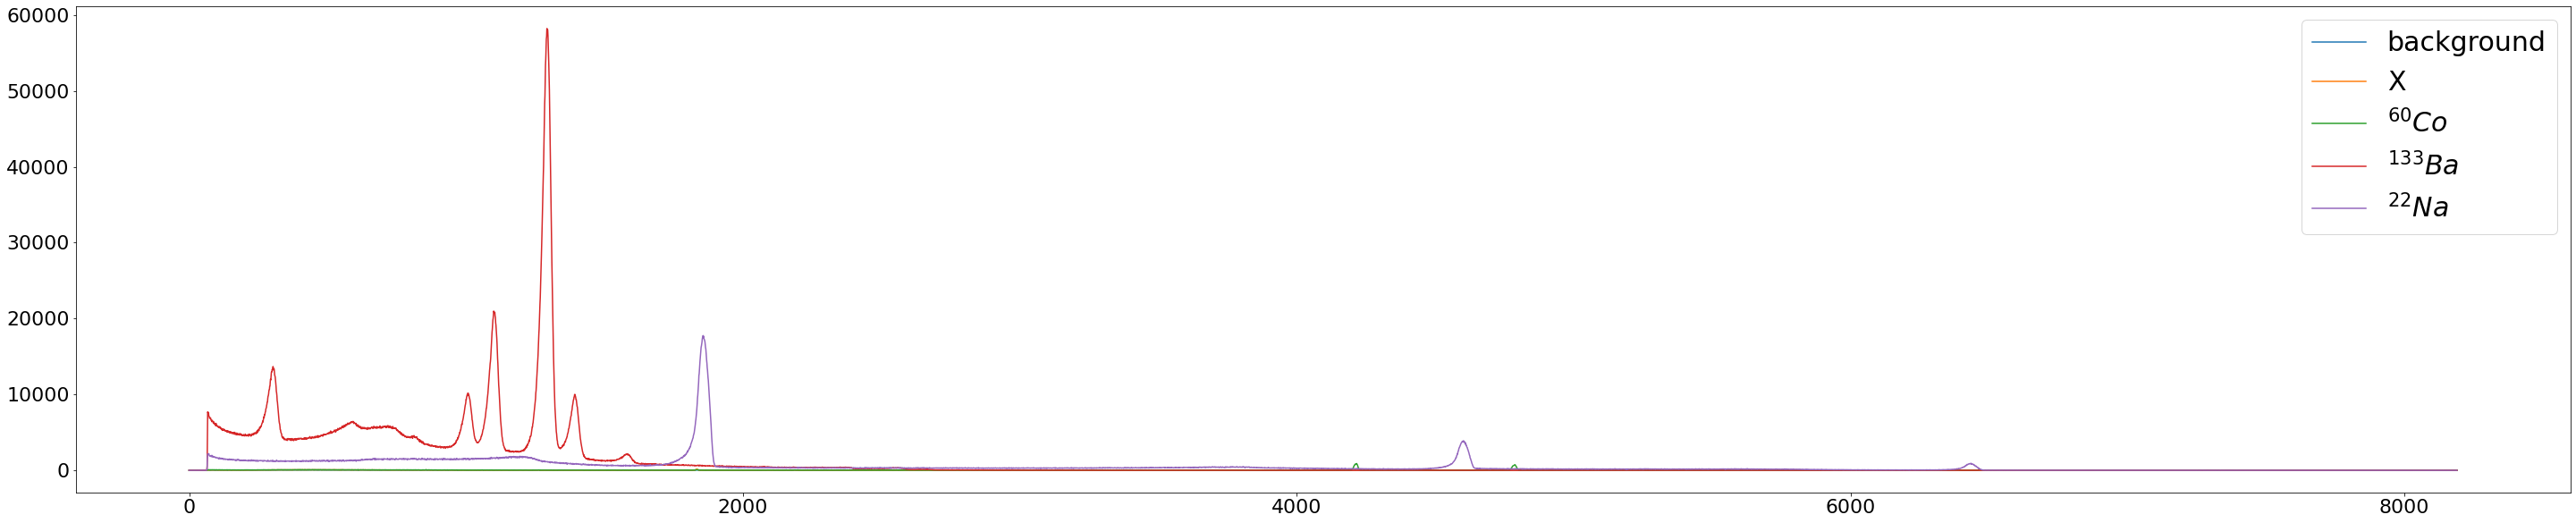

In [70]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
# plt.ylim(0, 1000)


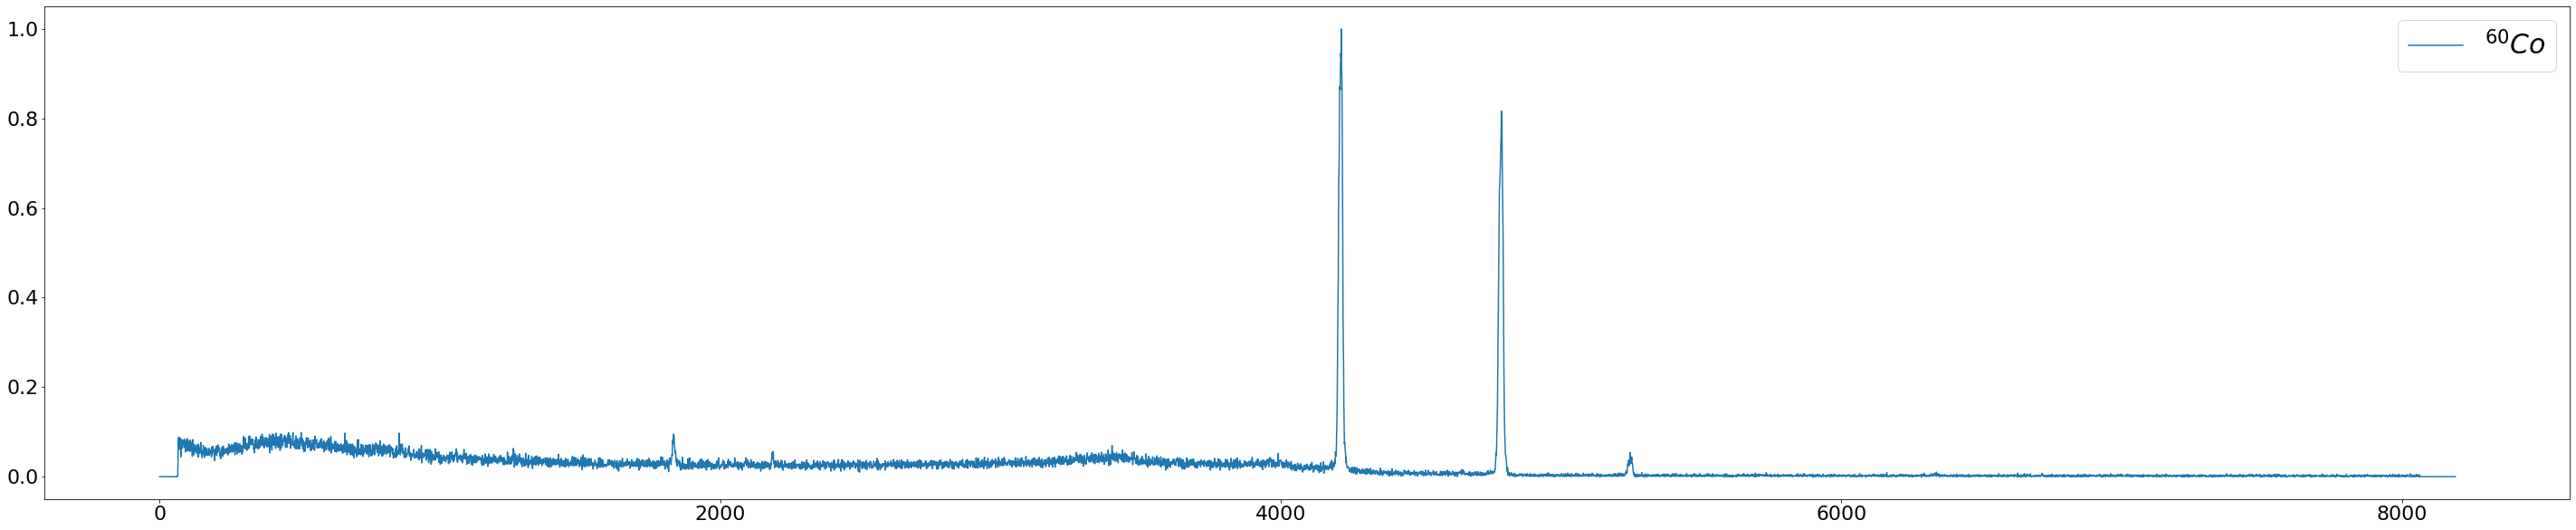

In [71]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

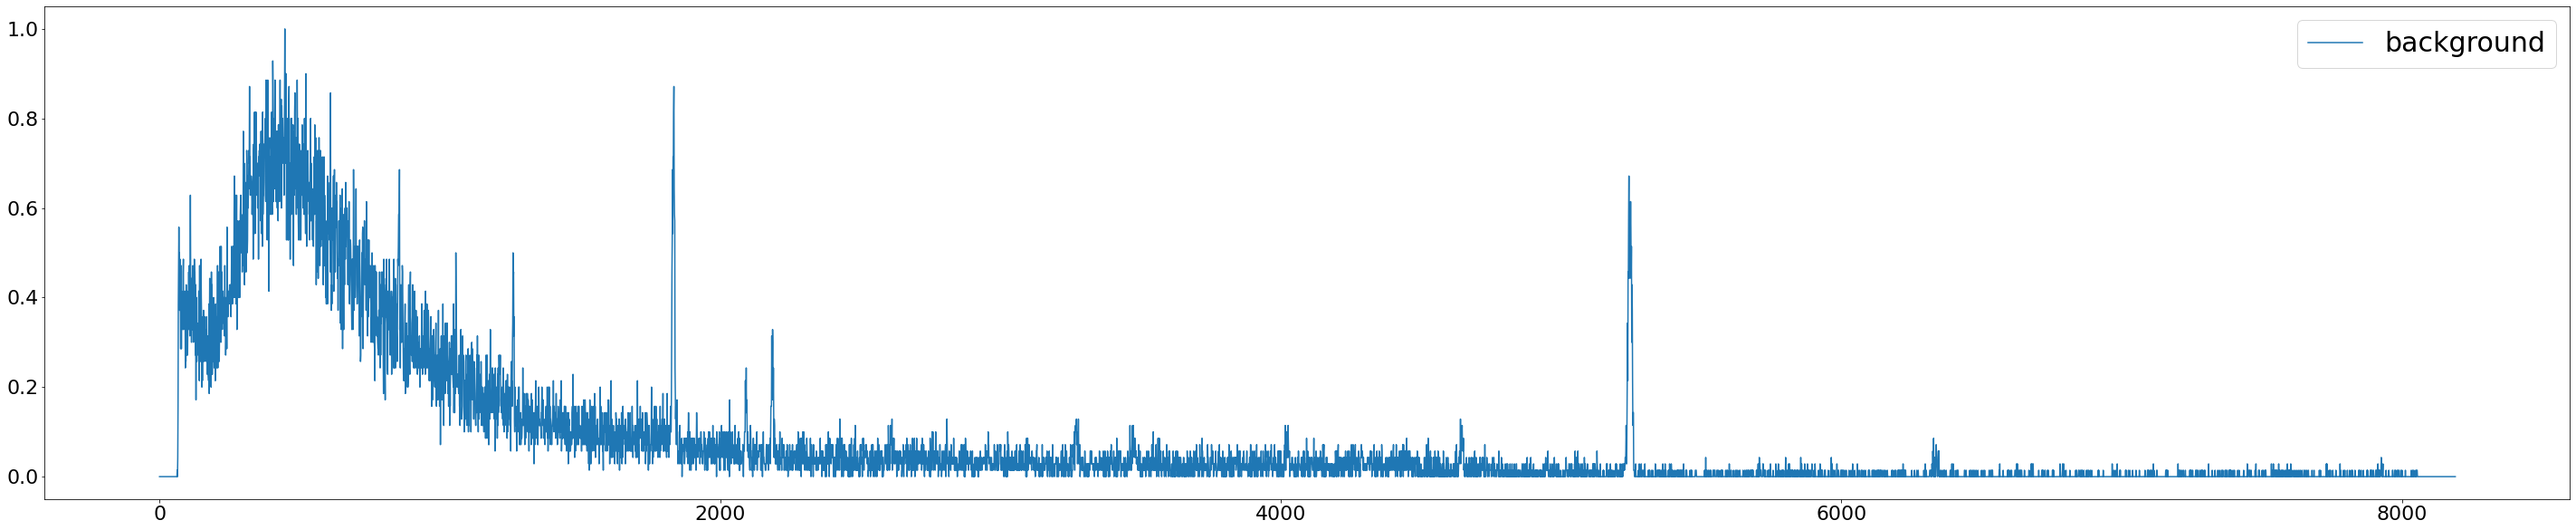

In [72]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

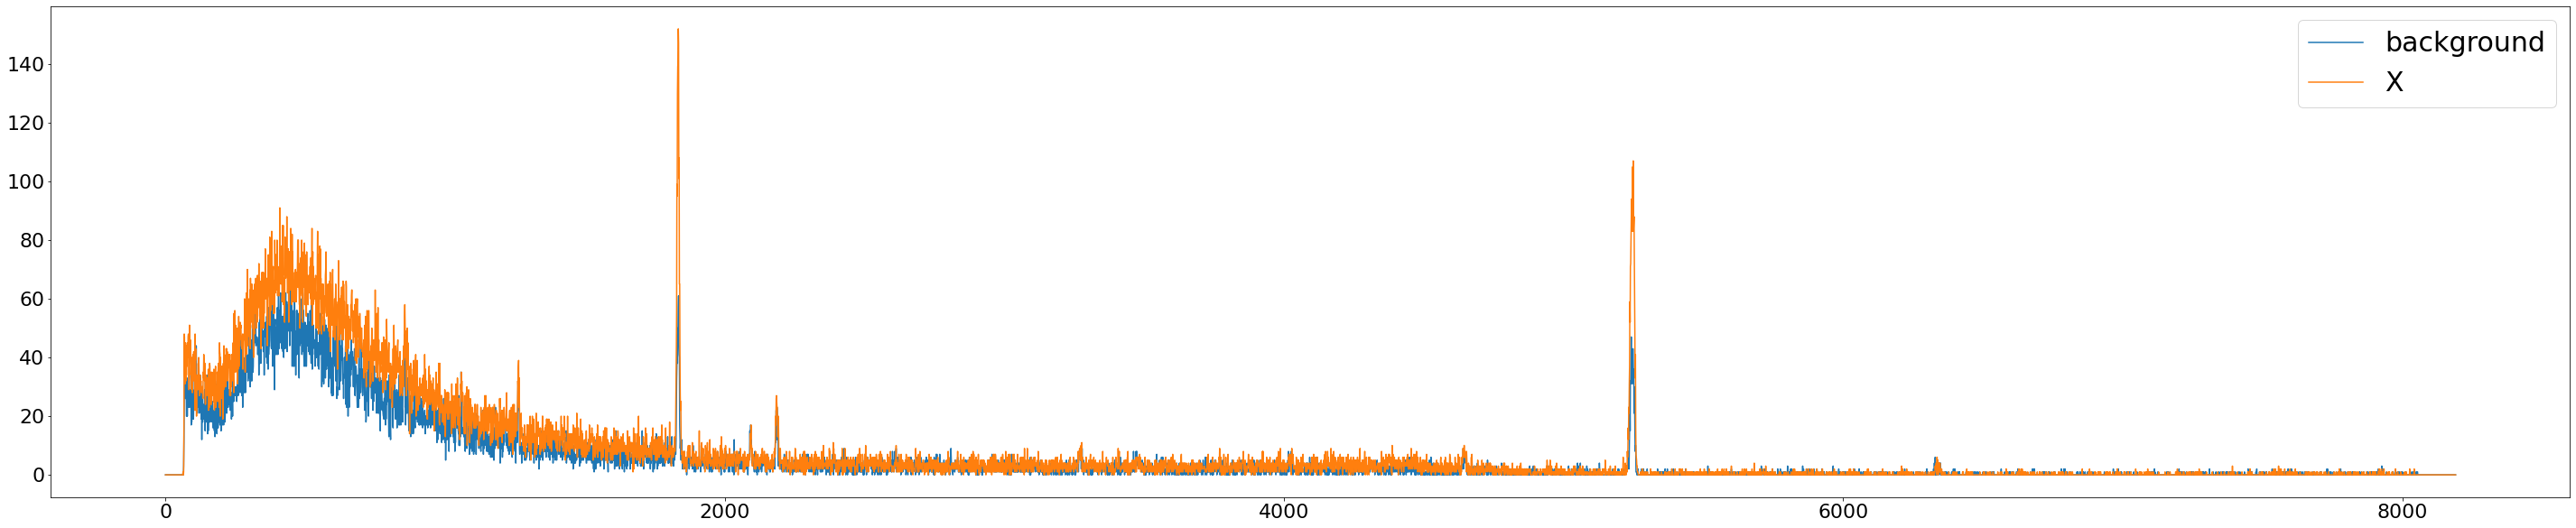

In [73]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

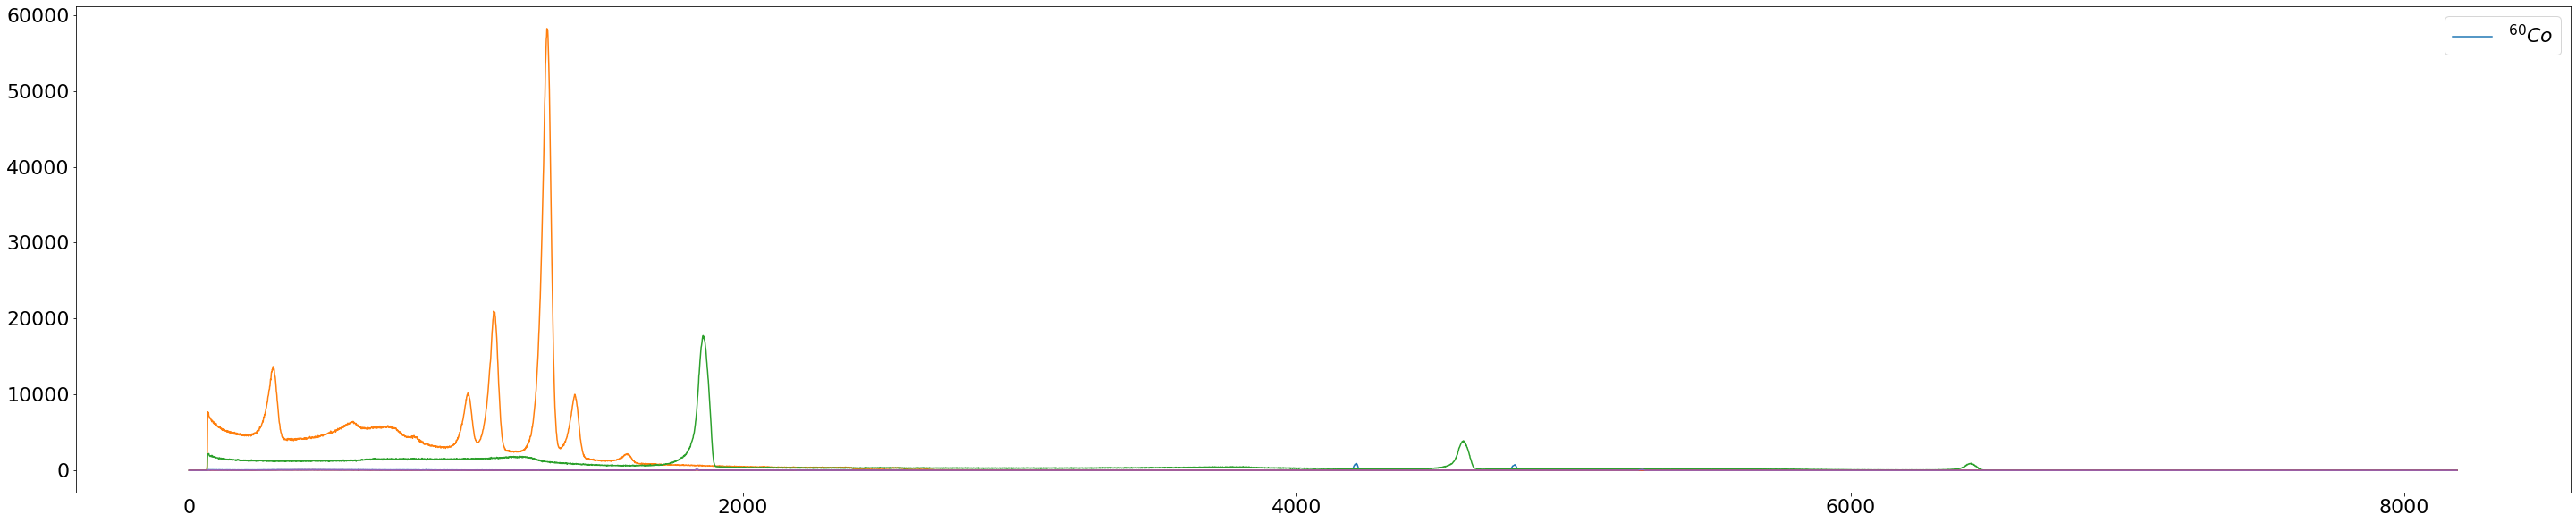

In [74]:
plt.figure(figsize=(50, 10))

plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133)
plt.plot(spectrum_na22)
plt.plot(spectrum_bkg)
plt.plot(spectrum_x)

plt.legend()

(4000.0, 5000.0)

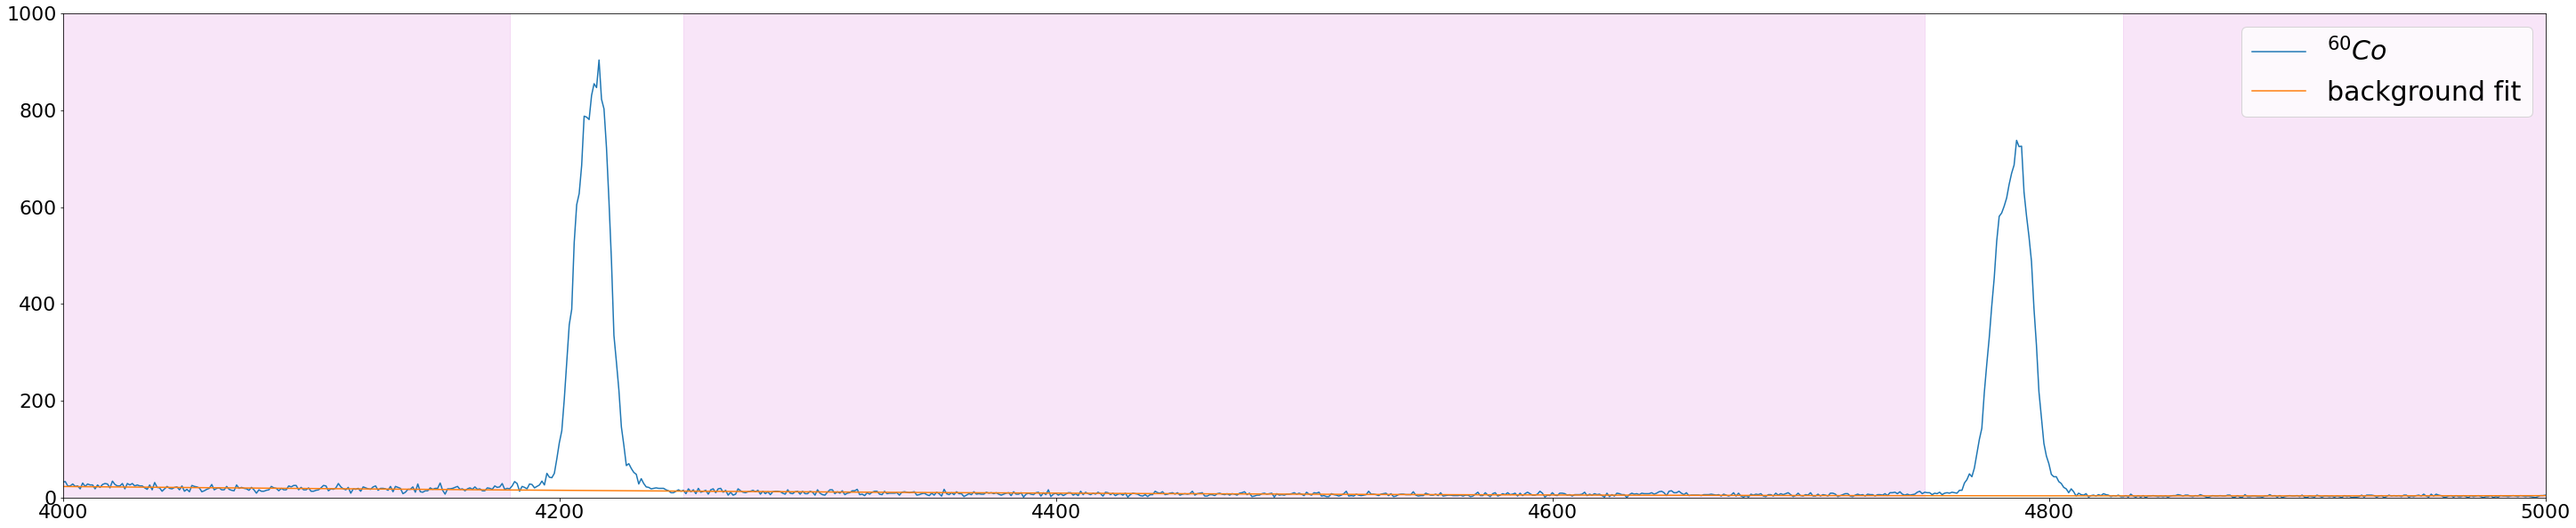

In [75]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
# plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.axvspan(4000, 4180, alpha=0.1, color='m')
plt.axvspan(4250, 4750, alpha=0.1, color='m')
plt.axvspan(4830, 5000, alpha=0.1, color='m')



xval = np.arange(len(spectrum_co60))

mask_bkg1 = ((xval>4000)*(xval<4180))^((xval>4250)*(xval<4750))^((xval>4830)*(xval<5000))
coeff = np.polyfit(xval[mask_bkg1], spectrum_co60[mask_bkg1], 2)
bkgfit = np.polyval(coeff, xval)

plt.plot(xval, bkgfit, label='background fit')

plt.legend(fontsize=30)
plt.ylim(0, 1000)
plt.xlim(4000, 5000)

In [79]:
from scipy.optimize import curve_fit

In [82]:
def gauss(x, *p):
    A, t0, v = p
    return A*np.exp(-(x-t0)**2/(2.*v))

def comb_gauss(x, *p):
    distr = 0
    for j in range(2):
        distr += gauss(x, *[p[j*3],p[j*3+1],p[j*3+2]])
    return distr

coeff_gauss, _ = curve_fit(comb_gauss, xval, spectrum_co60-bkgfit, p0=[900, 4250, 50, 800, 4800, 50])
fit_hist = comb_gauss(xval, *coeff_gauss)


(4000.0, 5000.0)

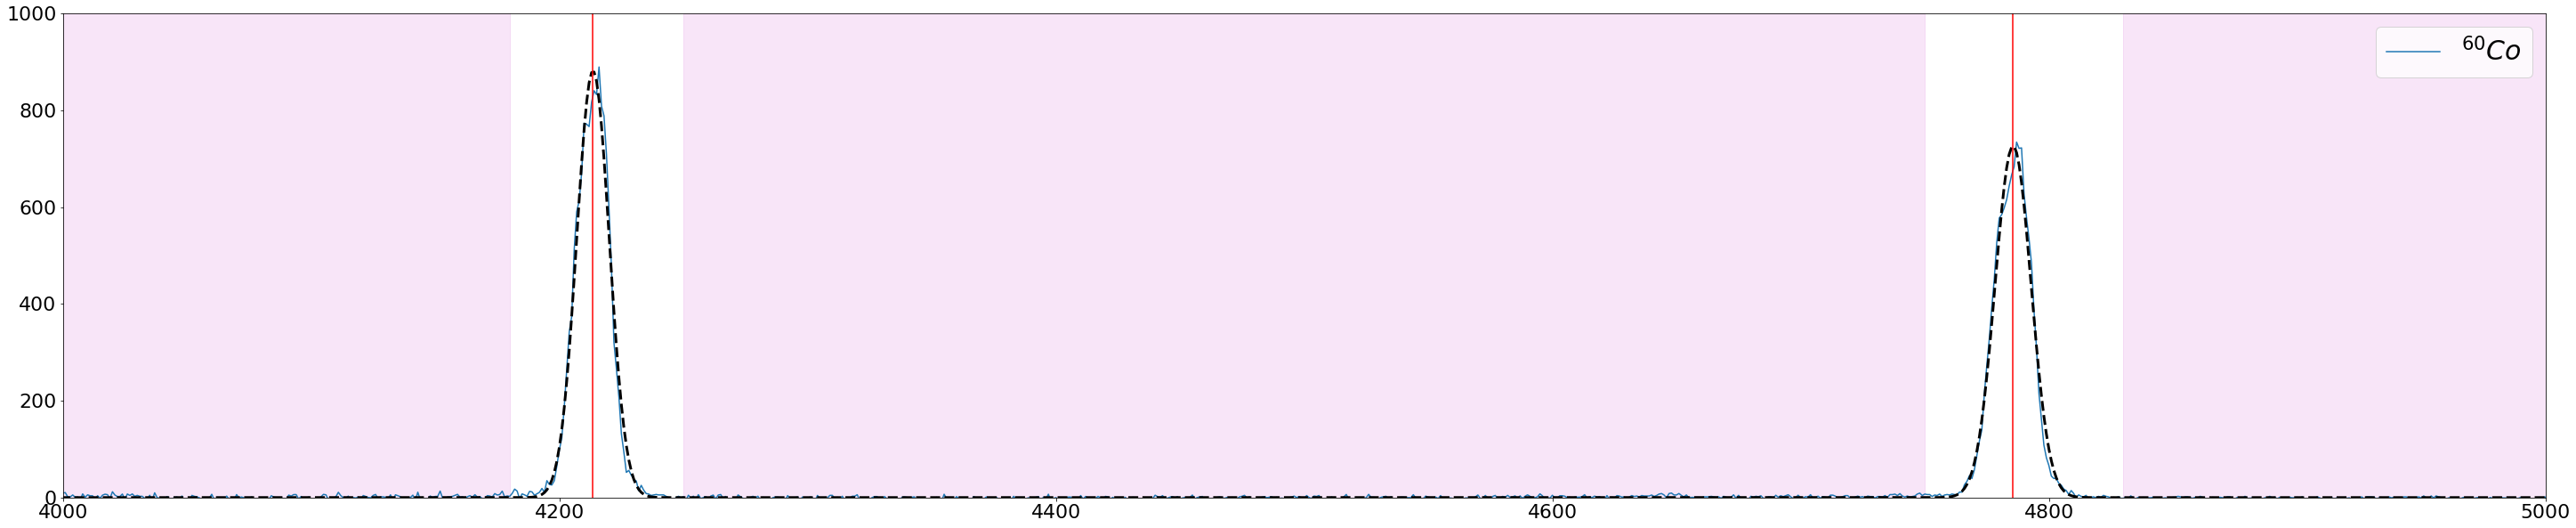

In [84]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60-bkgfit, label=r'$^{60}Co$')
# plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.axvspan(4000, 4180, alpha=0.1, color='m')
plt.axvspan(4250, 4750, alpha=0.1, color='m')
plt.axvspan(4830, 5000, alpha=0.1, color='m')


plt.plot(xval, fit_hist, c='k', lw=3, ls='--')

plt.axvline(coeff_gauss[1], c='r')
plt.axvline(coeff_gauss[4], c='r')

plt.legend(fontsize=30)
plt.ylim(0, 1000)
plt.xlim(4000, 5000)

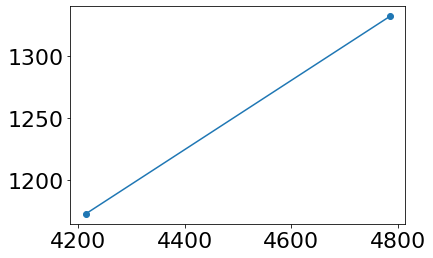

In [86]:
plt.plot([coeff_gauss[1],coeff_gauss[4]], [1173, 1332], '-o')

In [89]:
coeff_gauss

array([ 881.31116622, 4213.55524553,   42.94739844,  726.2081654 ,
       4785.59391675,   52.58219173])

In [87]:
cal1 = np.polyfit([coeff_gauss[1],coeff_gauss[4]], [1173, 1332], 1)

In [88]:
cal1

array([0.27795324, 1.82868284])

In [94]:
0.277*4200+1.8287

1165.2287000000001

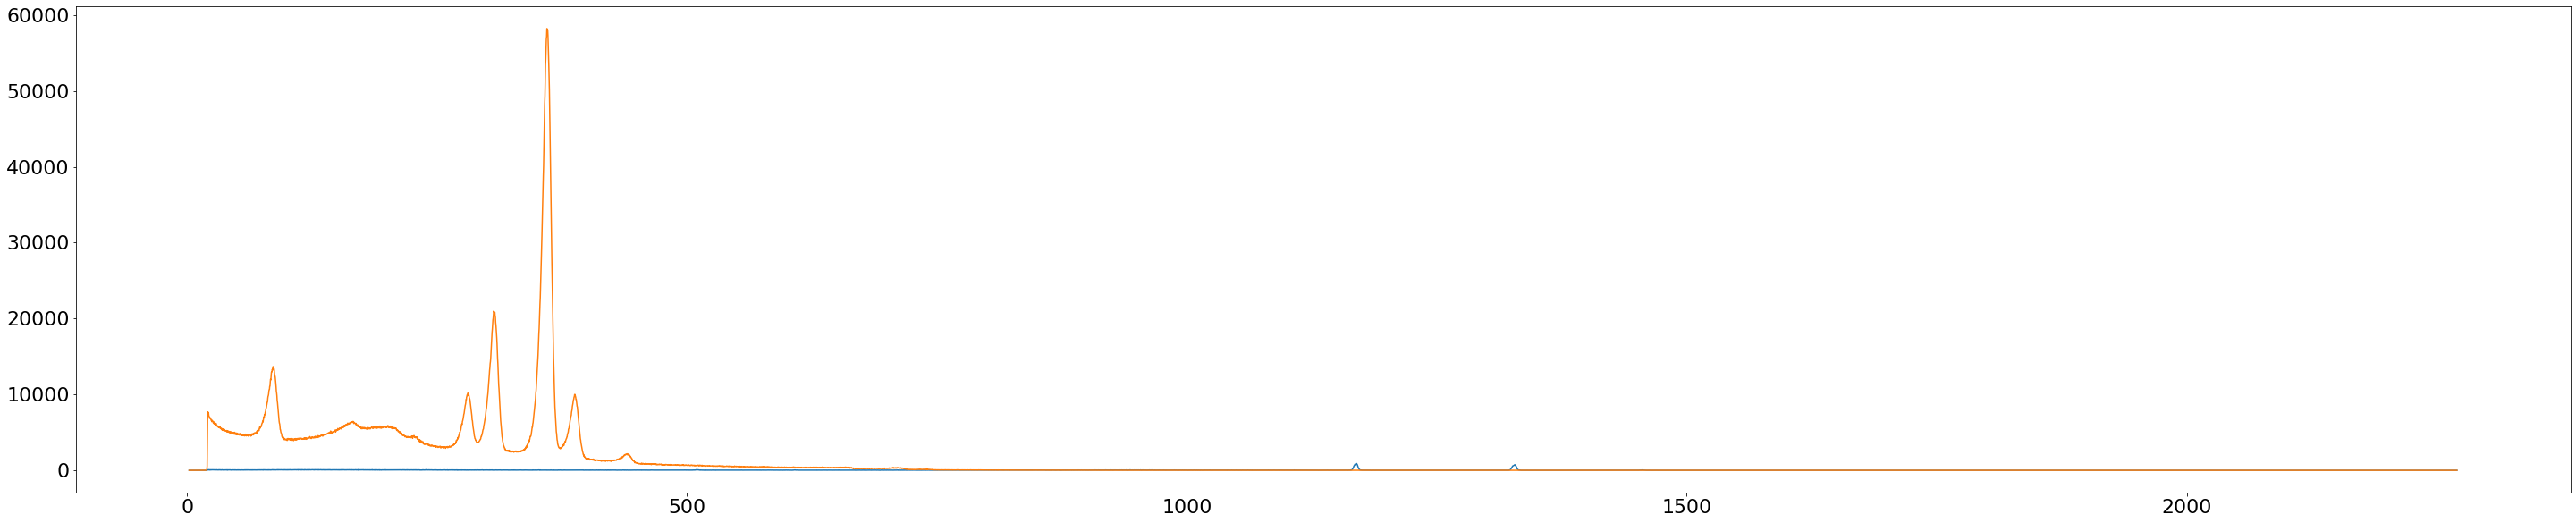

In [98]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(0.277*xval+1.8287, spectrum_co60, label=r'$^{60}Co$')
plt.plot(0.277*xval+1.8287, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')




(1200.0, 1500.0)

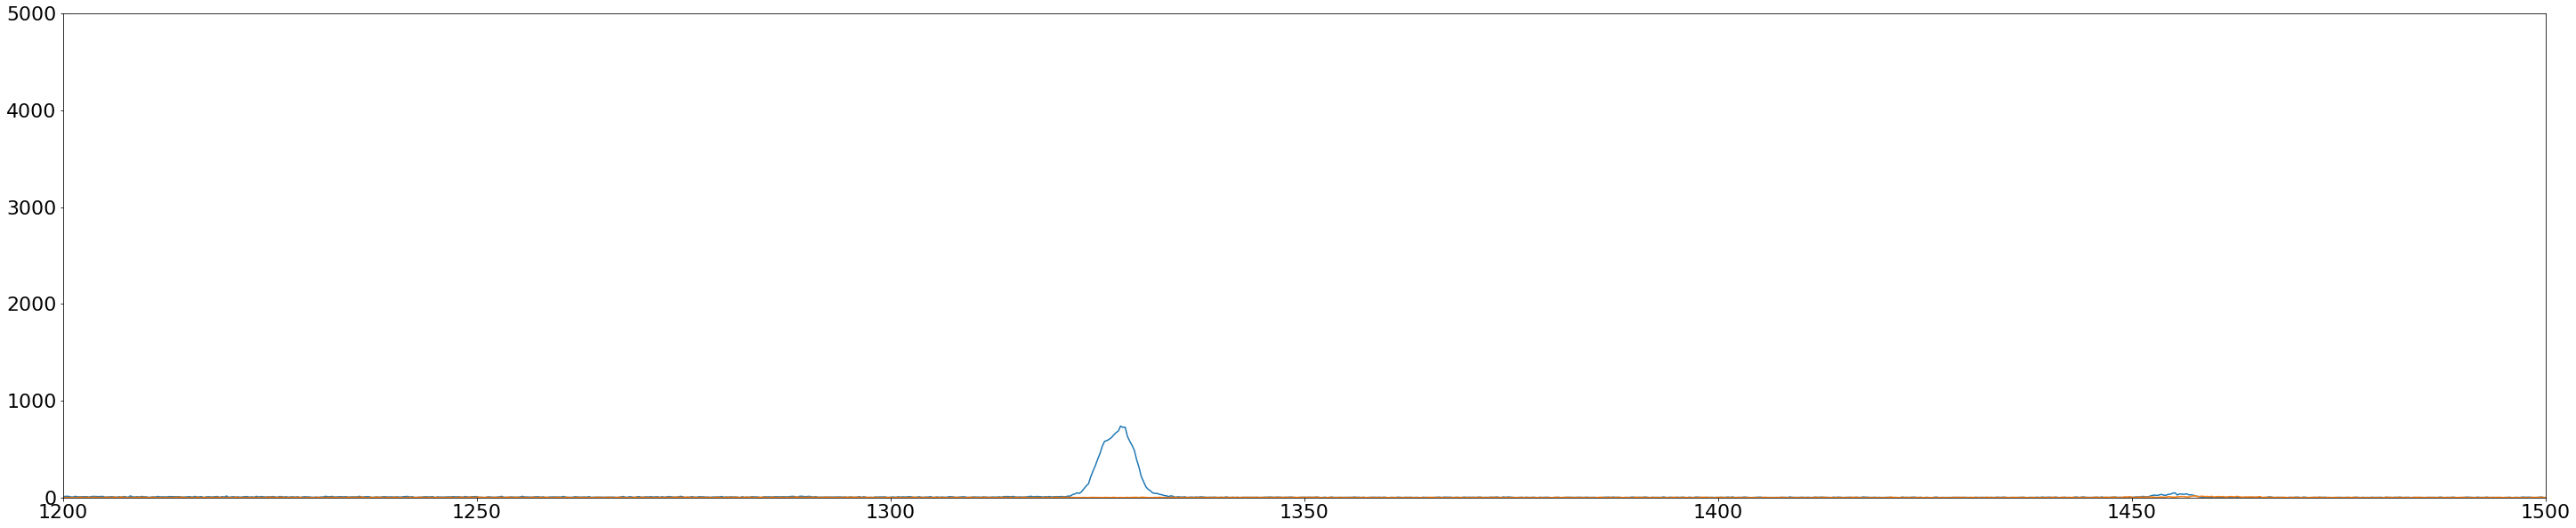

In [101]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(0.277*xval+1.8287, spectrum_co60, label=r'$^{60}Co$')
plt.plot(0.277*xval+1.8287, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.ylim(0, 5000)
plt.xlim(1200, 1500)

(0.0, 500.0)

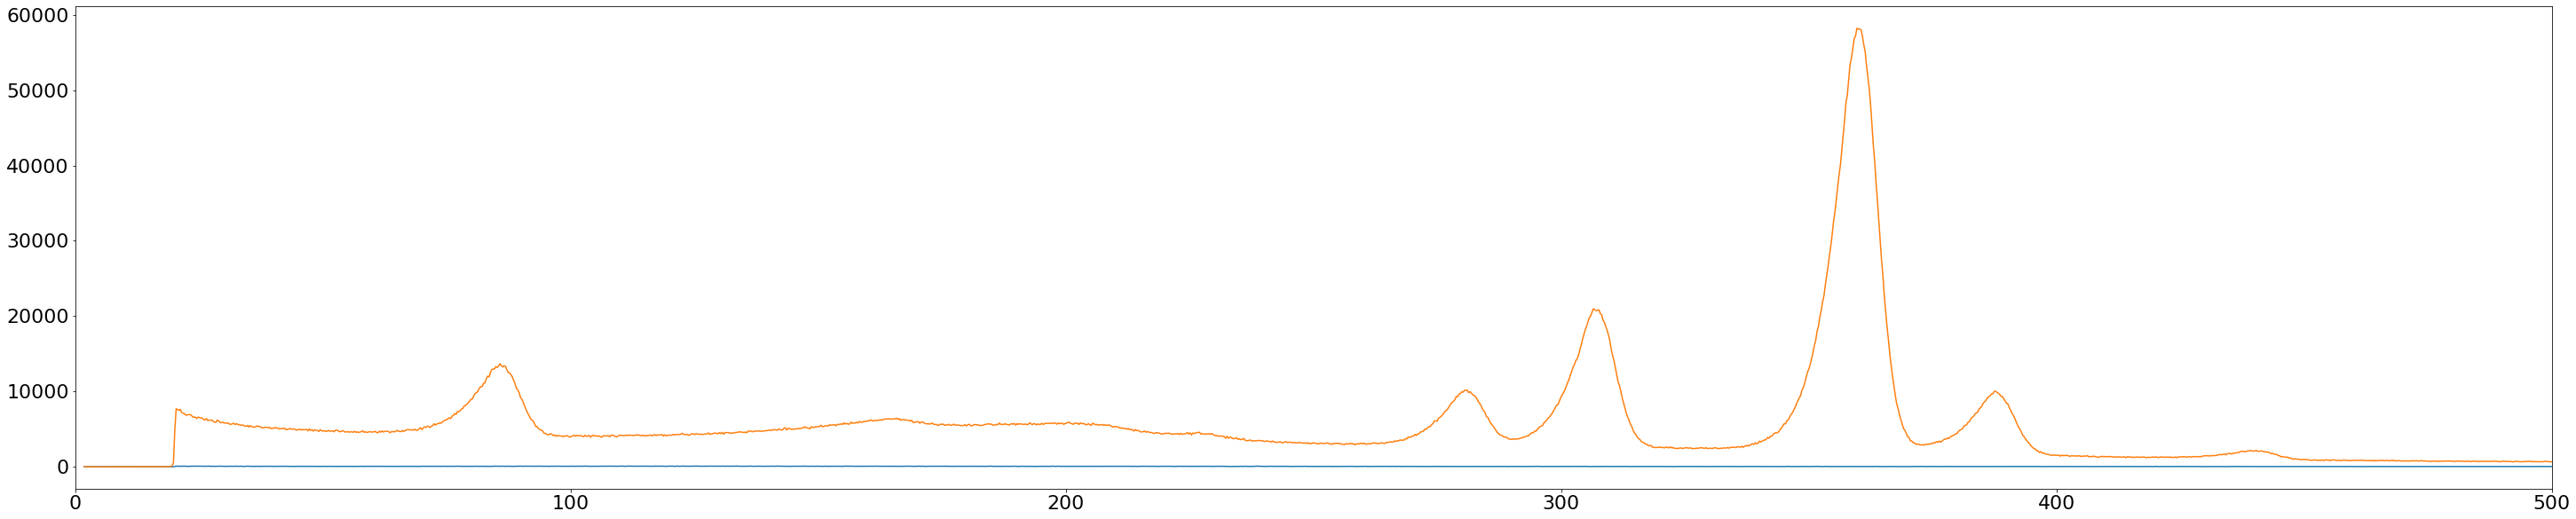

In [99]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(0.277*xval+1.8287, spectrum_co60, label=r'$^{60}Co$')
plt.plot(0.277*xval+1.8287, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')


plt.xlim(0, 500)

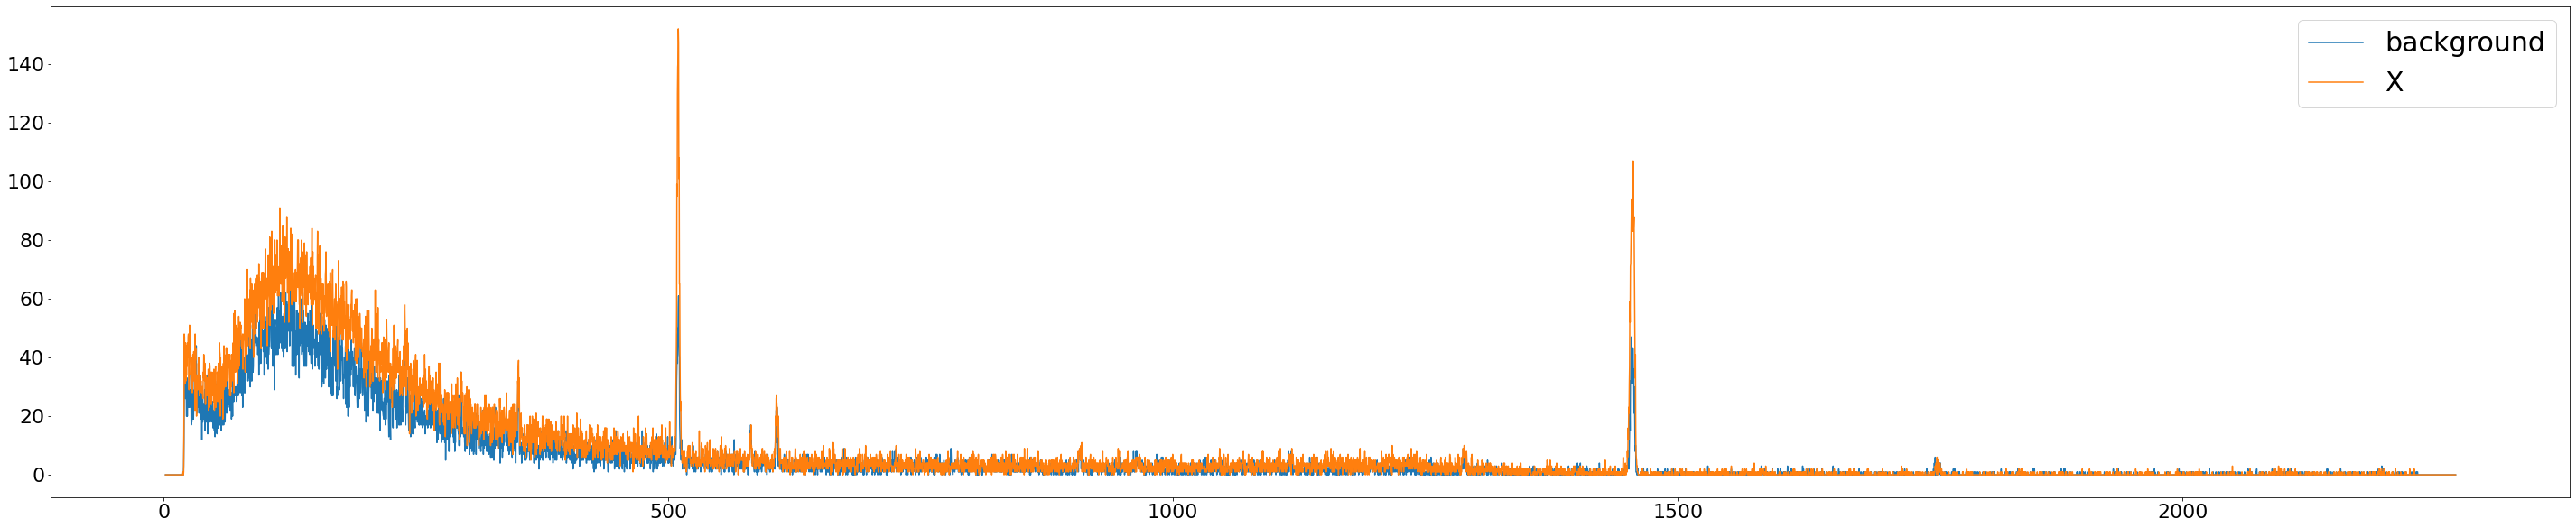

In [102]:
plt.figure(figsize=(50, 10))


plt.plot(0.277*xval+1.8287,spectrum_bkg, label=r'background')
plt.plot(0.277*xval+1.8287,spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

In [92]:
?np.polyfit